1. What Kind of Company is Home Credit?
Home Credit is a global financial services company that provides consumer loans, often to individuals who do not have access to traditional banking services. The company specializes in consumer lending, offering loans to individuals in emerging markets where access to credit is limited. Their main products include personal loans, microloans, and credit cards.

Target Audience: Home Credit focuses on offering financial products to people who are often underserved by traditional banks. This includes individuals with low credit scores, those who have limited or no credit history, and people in emerging economies.
Business Model: Home Credit assesses the creditworthiness of potential customers to determine whether they qualify for loans. By analyzing the risk of default, they make decisions about loan approvals and set appropriate interest rates.
2. What Do You Predict for This Competition?
The goal of the Home Credit Default Risk competition is to predict whether an applicant will default on a loan based on various features that describe the applicant's characteristics, financial history, and behavior.

In this competition, participants are provided with a dataset containing information about loan applicants, including their:

Demographics (e.g., age, gender, family status)
Credit history (e.g., number of past loans, existing debts)
Financial standing (e.g., income, employment status, number of dependents)
Other behavioral indicators (e.g., recent changes in the applicant's financial situation)
Participants are tasked with building a machine learning model that can accurately predict whether a given loan applicant will default on their loan. The target variable is usually a binary classification indicating whether a customer is at risk of default (default = 1, non-default = 0).

Predictions:
The model should predict the likelihood of a customer defaulting on their loan.
It should assess risk based on available financial and personal information, enabling Home Credit to make informed lending decisions.
3. What Benefits Can Companies Gain from Predicting This?
For companies like Home Credit, accurately predicting whether a customer will default on a loan is essential for risk management, financial stability, and business growth. Here are some key benefits:

Minimize Financial Losses:
By predicting default risk, Home Credit can avoid granting loans to high-risk applicants. This reduces the chances of loan defaults, which can lead to financial losses for the company.
Improved Risk Assessment:
Machine learning models can help Home Credit improve its credit scoring models, making the lending process more data-driven and objective. This allows them to better assess an applicant’s creditworthiness based on their financial history and other relevant factors.
Optimized Lending Strategy:
Accurate predictions allow Home Credit to target customers with better creditworthiness, while adjusting the loan terms (e.g., interest rates, repayment schedules) based on predicted risk. For example, low-risk applicants might receive lower interest rates, while higher-risk applicants may face higher rates.
Efficient Customer Acquisition:
By assessing risk more accurately, Home Credit can focus its marketing efforts on acquiring customers who are more likely to repay their loans. This results in higher profitability and reduced loan default rates.
Regulatory Compliance:
Many countries have regulatory requirements for lenders to assess the ability of borrowers to repay loans. A robust predictive model helps Home Credit comply with these regulations and maintain customer trust.
Enhanced Customer Experience:
Predicting defaults can also improve customer experience by tailoring loan offers to the customer’s risk profile. Customers who are less likely to default may be offered more favorable terms, which could lead to better satisfaction and loyalty.

First 5 rows of the dataset:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...  

C:\Users\Mercy\AppData\Local\Temp\ipykernel_12016\1297123578.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=data, palette='viridis')


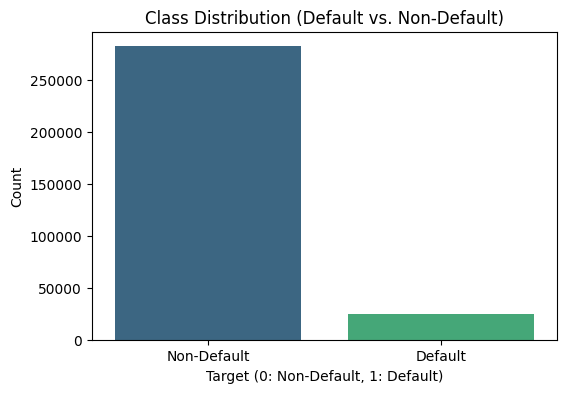


Class Distribution (%):
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


In [37]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update the file path as necessary)
data = pd.read_csv(r'C:\Users\Mercy\Downloads\application_train.csv')

# 1. Overview of the dataset
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

# 2. Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print("\nMissing Values Analysis:")
print(missing_df)

# 3. Draw a graph showing class ratios
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=data, palette='viridis')
plt.title('Class Distribution (Default vs. Non-Default)')
plt.xlabel('Target (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'])
plt.show()

# Print class distribution percentages
class_ratios = data['TARGET'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(class_ratios)


1. Data Quality and Missing Values
Issue: There are missing values in various columns.
Questions:
Which columns have the most missing values? How should we handle them—by imputation, removal, or leaving them as-is?
Do the missing values affect the predictive power of the model? Should we drop rows or columns with missing data, or would imputing values make more sense?
What imputation methods are most appropriate for different types of variables (e.g., mean imputation for numerical, mode for categorical)?

2. Imbalanced Dataset
Issue: The target variable, TARGET (indicating whether a client defaulted or not), may be imbalanced.
Questions:
What is the distribution of the target variable? Are there more non-defaulters (0) than defaulters (1)?
If there is class imbalance, what strategies can we apply to handle it (e.g., oversampling, undersampling, or class weights in the model)?
Should we apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset?

3. Feature Engineering
Issue: Raw features in the dataset may not be directly useful for prediction.
Questions:
Are there any categorical features that need to be encoded (e.g., one-hot encoding, label encoding)?
Are there numerical features that can be transformed to improve model performance (e.g., logarithmic transformation for skewed data)?
Can we create new features that might enhance prediction accuracy (e.g., combining columns like income and age to create new variables)?

4. Correlation between Features and Target Variable
Issue: We need to understand how different features relate to the target variable (default or non-default).
Questions:
Which features are most correlated with the target variable? Are there any strong predictors of default?
How do numerical features like income, age, or credit score relate to the likelihood of defaulting on a loan?
Do certain categorical features like family status, housing situation, or occupation provide significant insights into default behavior?

5. Outliers and Data Distribution
Issue: Outliers and skewed distributions could affect model accuracy.
Questions:
Are there outliers in any numerical columns (e.g., income or loan amount)?
How do we handle these outliers—should we remove them, transform them, or keep them as is?
Do any numerical features exhibit skewness, and would transformation (like log or square root) help in creating a more normal distribution?

6. Temporal or Seasonal Patterns
Issue: Loan default behavior could vary across different periods or seasons.
Questions:
Are there any temporal patterns in the data (e.g., defaults vary by season, year, or month)?
Can we incorporate time-related features such as the length of time a client has been with the company to predict defaults?
How might recent economic conditions (e.g., COVID-19) impact loan defaults, and how can we simulate such factors in the data?

7. Model Performance
Issue: We need to build and evaluate a model that predicts the likelihood of a client defaulting on a loan.
Questions:
Which machine learning models are most suitable for this task (e.g., logistic regression, decision trees, random forests, or gradient boosting)?
What metrics should we use to evaluate the model’s performance (e.g., accuracy, F1-score, ROC AUC)?
How should we tune the model’s hyperparameters for optimal performance?

8. Impact of External Factors
Issue: External factors like economic conditions might affect the likelihood of default.
Questions:
How can we incorporate external economic indicators (e.g., unemployment rates, inflation) into the analysis to improve predictions?
Are there any other features that should be included based on domain knowledge (e.g., location, historical loan data, etc.)?


In [38]:
# Summary statistics of numerical features
numerical_summary = data.describe()
print(numerical_summary)


          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [39]:
# Count of missing values for each column
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(data)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_summary)


                          Missing Values  Percentage
COMMONAREA_AVG                    214865   69.872297
COMMONAREA_MODE                   214865   69.872297
COMMONAREA_MEDI                   214865   69.872297
NONLIVINGAPARTMENTS_MEDI          213514   69.432963
NONLIVINGAPARTMENTS_MODE          213514   69.432963
...                                  ...         ...
FLAG_DOCUMENT_16                       0    0.000000
FLAG_DOCUMENT_15                       0    0.000000
FLAG_DOCUMENT_14                       0    0.000000
FLAG_DOCUMENT_20                       0    0.000000
FLAG_DOCUMENT_21                       0    0.000000

[122 rows x 2 columns]


C:\Users\Mercy\AppData\Local\Temp\ipykernel_12016\2611024576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=data, palette='viridis')


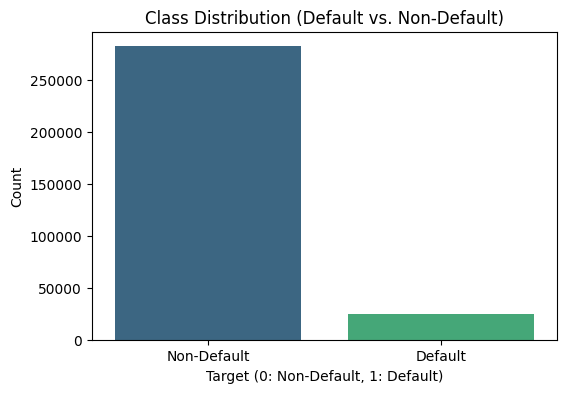

In [40]:
# Bar plot of the TARGET variable
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=data, palette='viridis')
plt.title('Class Distribution (Default vs. Non-Default)')
plt.xlabel('Target (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'])
plt.show()


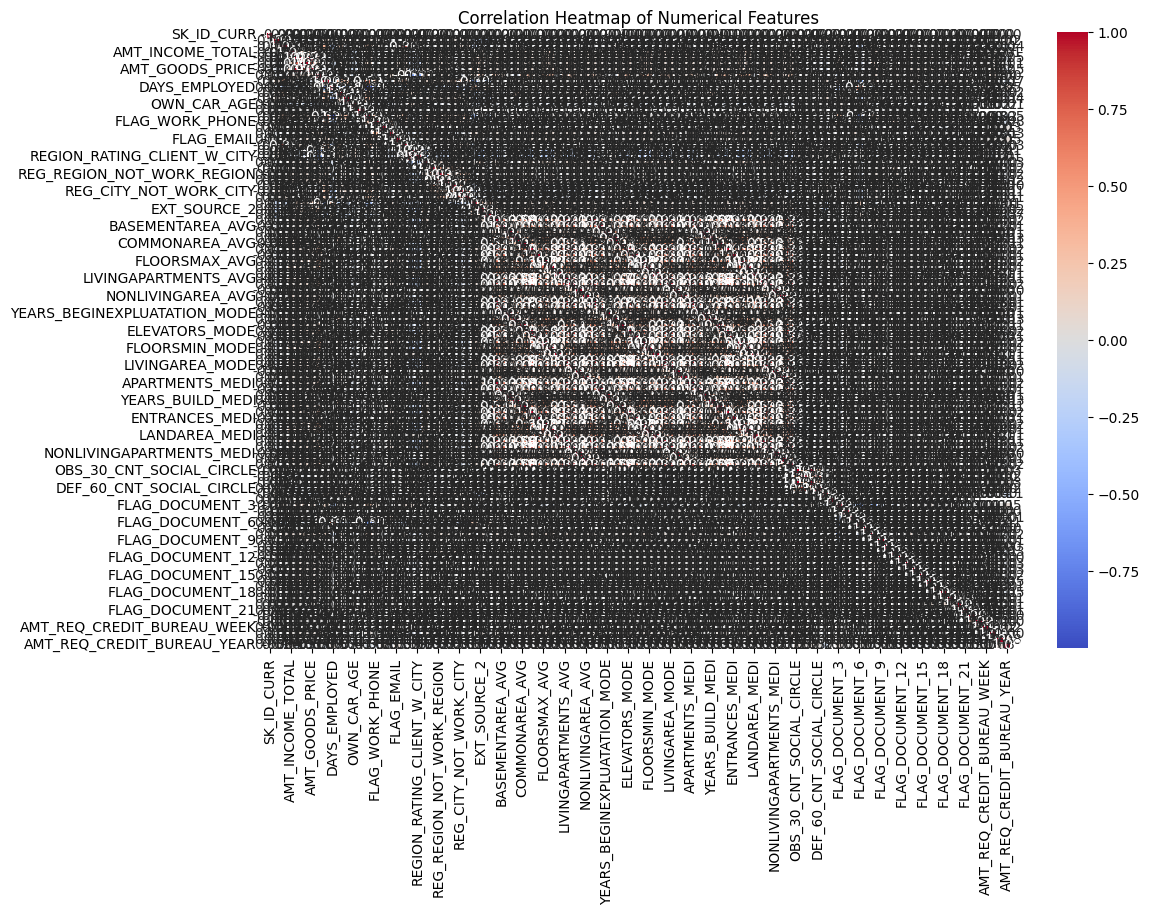

In [46]:
import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
